In [13]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [14]:
tickers = ['JPM', 'BAC']
data = yf.download(tickers, start="2018-01-01", end="2024-01-01")['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [15]:
asset1 = data['JPM']
asset2 = data['BAC']

# Engle-Granger Cointegration Test
score, p_value, _ = coint(asset1, asset2)

print(f"Cointegration test score: {score}")
print(f"Cointegration test p-value: {p_value}")

if p_value < 0.05:
    print("The assets are cointegrated.")
else:
    print("The assets are not cointegrated.")

Cointegration test score: 0.14034211821341563
Cointegration test p-value: 0.9886791343040628
The assets are not cointegrated.


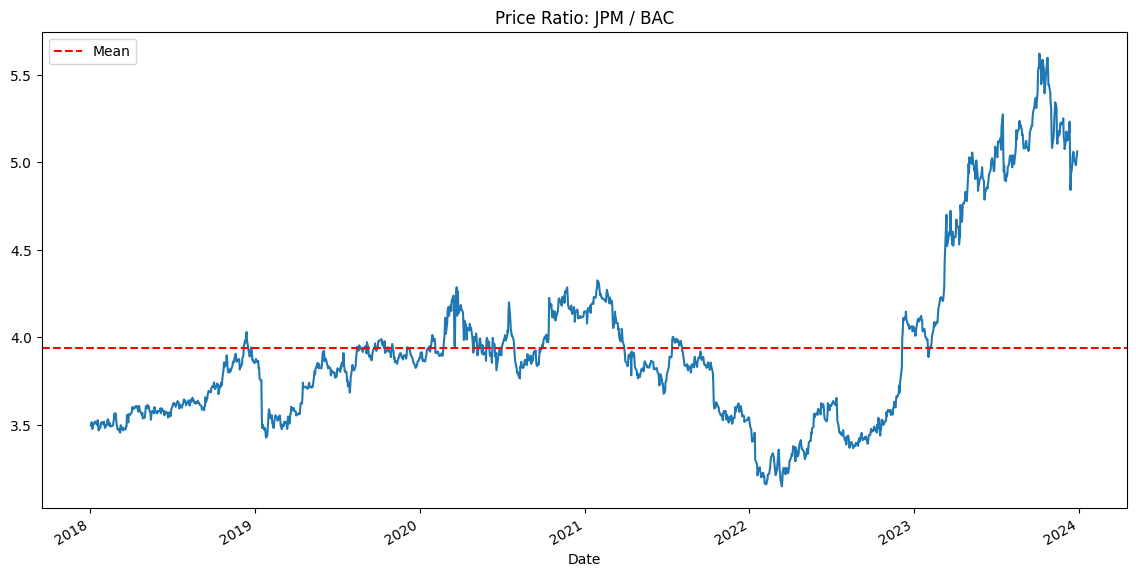

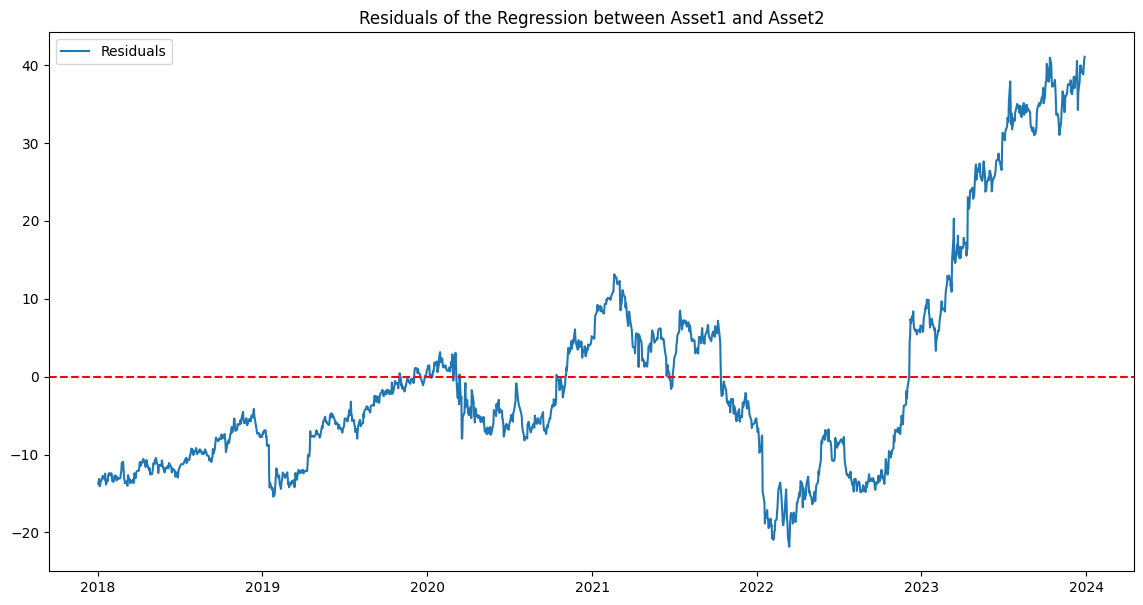

In [17]:
price_ratio = asset1 / asset2

plt.figure(figsize=(14, 7))
price_ratio.plot(title=f'Price Ratio: {tickers[0]} / {tickers[1]}')
plt.axhline(price_ratio.mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

# residuals
X = sm.add_constant(asset2)
model = sm.OLS(asset1, X).fit()
residuals = model.resid

plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of the Regression between Asset1 and Asset2')
plt.legend()
plt.show()


In [18]:
tickers = ['QQQ', 'XLK']
data = yf.download(tickers, start="2018-01-01", end="2024-01-01")['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [19]:
asset1 = data['QQQ']
asset2 = data['XLK']

# Engle-Granger Cointegration Test
score, p_value, _ = coint(asset1, asset2)

print(f"Cointegration test score: {score}")
print(f"Cointegration test p-value: {p_value}")

if p_value < 0.05:
    print("The assets are cointegrated.")
else:
    print("The assets are not cointegrated.")

Cointegration test score: -1.0867348006376836
Cointegration test p-value: 0.8851240992295578
The assets are not cointegrated.
